In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def target_distribution(x):
    """
    Distribuzione target (distribuzione canonica) da campionare.
    """
    mean = 0.0
    variance = 1.0
    return np.exp(-0.5 * ((x - mean) / variance)**2) / (np.sqrt(2 * np.pi) * variance)

In [3]:
def metropolis_hastings_sampler(target_distribution, num_samples, proposal_stddev, initial_sample):
    """
    Implementazione dell'algoritmo di Metropolis-Hastings per campionare da una distribuzione target.
    
    Args:
        target_distribution: La distribuzione target da campionare.
        num_samples: Il numero di campioni da generare.
        proposal_stddev: Deviazione standard della distribuzione proposta.
        initial_sample: Il campione iniziale per l'algoritmo.
        
    Returns:
        Un array contenente i campioni campionati dalla distribuzione target.
    """
    samples = [initial_sample]
    current_sample = initial_sample
    
    for _ in range(num_samples):
        proposal = np.random.normal(current_sample, proposal_stddev)
        
        acceptance_ratio = min(1, target_distribution(proposal) / target_distribution(current_sample))
        accept = np.random.uniform(0, 1) < acceptance_ratio
        
        if accept:
            current_sample = proposal
        
        samples.append(current_sample)
    
    return np.array(samples)

In [6]:
# Parametri
num_samples = 100000
proposal_stddev = 0.5
initial_sample = 0.0

# Campionamento utilizzando Metropolis-Hastings
samples = metropolis_hastings_sampler(target_distribution, num_samples, proposal_stddev, initial_sample)

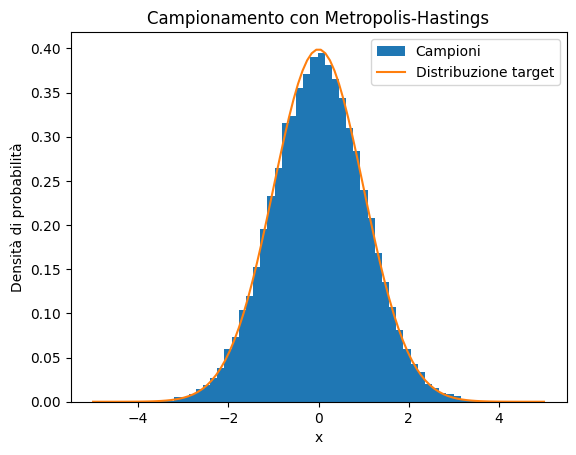

In [7]:
# Plot dei risultati
plt.hist(samples, bins=50, density=True, label="Campioni")
x = np.linspace(-5, 5, 100)
plt.plot(x, target_distribution(x), label="Distribuzione target")
plt.legend()
plt.xlabel("x")
plt.ylabel("Densità di probabilità")
plt.title("Campionamento con Metropolis-Hastings")
plt.show()